In [ ]:

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as npd
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_openml


In [ ]:
##regression
reg= fetch_openml(data_id=560)
##classification
clas= fetch_openml(data_id=1504)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
x_train,x_val,y_train,y_val=train_test_split(reg.data,reg.target,test_size=.2,random_state=0)
x_train2,x_val2,y_train2,y_val2=train_test_split(clas.data,clas.target,test_size=.2,random_state=0)



In [ ]:
##Sequential
from keras.models import Sequential
from keras.layers import Input,Dense
nn=Sequential()
nn.add(Input(shape=(14,)))
nn.add(Dense(30,activation="sigmoid")) m,,,,,,,,,,
nn.add(Dense(10,activation="sigmoid"))
nn.add(Dense(1))

##training
nn.compile(optimizer="adam",loss="mse",metrics=["mse"])
history=nn.fit(x_train,y_train,epochs=800,validation_data=(x_val,y_val),verbose=0)

##Sequential
##different hidden layer shape and different activation
nn2=Sequential()
nn2.add(Input(shape=(14,)))
nn2.add(Dense(50,activation="relu"))
nn2.add(Dense(50,activation="relu"))
nn2.add(Dense(1))

##training
nn2.compile(optimizer="adam",loss="mse",metrics=["mse"])
history2=nn2.fit(x_train,y_train,epochs=300,validation_data=(x_val,y_val),verbose=0)

##Sequential
##use sgd optimizer and activation, and different activations but same node setup as the first
nn3=Sequential()
nn3.add(Input(shape=(14,)))
nn3.add(Dense(30,activation="softmax"))
nn3.add(Dense(10,activation="softmax"))
nn3.add(Dense(1))

##training
nn3.compile(optimizer="SGD",loss="mse",metrics=["mse"])
history3=nn3.fit(x_train,y_train,epochs=200,validation_data=(x_val,y_val),verbose=0)

##Sequential
##same as first but only different hidden layer node numbers
nn4=Sequential()
nn4.add(Input(shape=(14,)))
nn4.add(Dense(10,activation="sigmoid"))
nn4.add(Dense(5,activation="sigmoid"))
nn4.add(Dense(1))

##training
nn4.compile(optimizer="adam",loss="mse",metrics=["mse"])
history4=nn4.fit(x_train,y_train,epochs=800,validation_data=(x_val,y_val),verbose=0)

In [ ]:
history.history["mse"]
history.history["val_mse"]

history2.history["mse"]
history2.history["val_mse"]

history3.history["mse"]
history3.history["val_mse"]

history4.history["mse"]
history4.history["val_mse"]





[412.43206787109375,
 410.2325439453125,
 407.9535217285156,
 405.0561828613281,
 398.7376708984375,
 395.334228515625,
 393.3653869628906,
 391.43310546875,
 389.5220642089844,
 387.63531494140625,
 385.7601013183594,
 383.895751953125,
 382.0400085449219,
 380.23583984375,
 378.460693359375,
 376.68310546875,
 374.9484558105469,
 373.2057800292969,
 371.5006103515625,
 369.82177734375,
 368.1471862792969,
 366.4899597167969,
 364.8617248535156,
 363.2596435546875,
 361.6750793457031,
 360.11895751953125,
 358.5650329589844,
 357.0079650878906,
 355.4869079589844,
 353.9654846191406,
 352.4881591796875,
 351.0240783691406,
 349.59063720703125,
 348.15924072265625,
 346.7567443847656,
 345.3617858886719,
 343.979736328125,
 342.6194763183594,
 341.2904357910156,
 339.93695068359375,
 338.593994140625,
 337.27520751953125,
 335.980712890625,
 334.70465087890625,
 333.45672607421875,
 332.2092590332031,
 330.973876953125,
 329.7579650878906,
 328.54632568359375,
 327.35113525390625,
 326

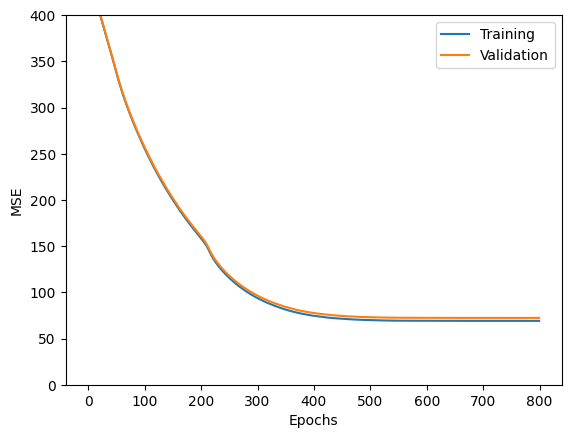

72.30574798583984


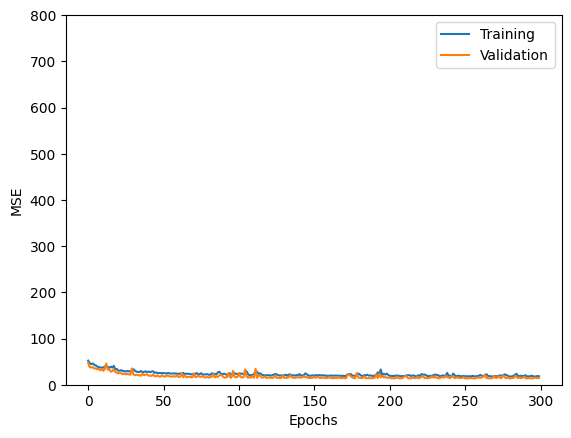

13.51193904876709


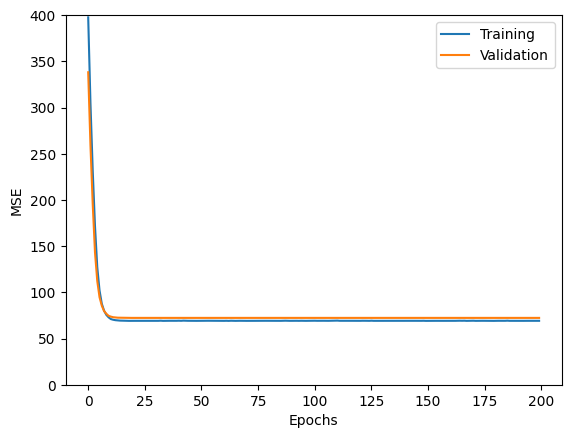

72.3229751586914


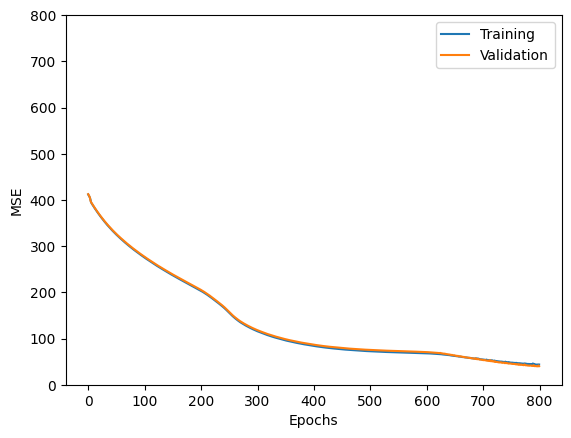

39.78847122192383


In [ ]:
plt.plot(history.history["mse"],label="Training")
plt.plot(history.history["val_mse"],label="Validation")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.ylim(0,400)
plt.legend()
plt.show()
##minimum error
print(min(history.history["val_mse"]))

plt.plot(history2.history["mse"],label="Training")
plt.plot(history2.history["val_mse"],label="Validation")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.ylim(0,800)
plt.legend()
plt.show()
##minimum error
print(min(history2.history["val_mse"]))

plt.plot(history3.history["mse"],label="Training")
plt.plot(history3.history["val_mse"],label="Validation")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.ylim(0,400)
plt.legend()
plt.show()
##minimum error
print(min(history3.history["val_mse"]))

plt.plot(history4.history["mse"],label="Training")
plt.plot(history4.history["val_mse"],label="Validation")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.ylim(0,800)
plt.legend()
plt.show()
##minimum error
print(min(history4.history["val_mse"]))

In [ ]:
nn.evaluate(x_val,y_val)
y_pred=nn.predict(x_val)
y_pred

2/2 [==============================] - 0s 6ms/step


array([[19.17035 ],
       [19.173922],
       [19.17037 ],
       [19.171   ],
       [19.170362],
       [19.170742],
       [19.173244],
       [19.174374],
       [19.172712],
       [19.171711],
       [19.174501],
       [19.173141],
       [19.170412],
       [19.174332],
       [19.170362],
       [19.170364],
       [19.174536],
       [19.170362],
       [19.170578],
       [19.170773],
       [19.174526],
       [19.17042 ],
       [19.174528],
       [19.170393],
       [19.170807],
       [19.174536],
       [19.17309 ],
       [19.174511],
       [19.170366],
       [19.174496],
       [19.174536],
       [19.172113],
       [19.170496],
       [19.170366],
       [19.174534],
       [19.170362],
       [19.174536],
       [19.174208],
       [19.170362],
       [19.170385],
       [19.170559],
       [19.170822],
       [19.174534],
       [19.172762],
       [19.170881],
       [19.170542],
       [19.170704],
       [19.170362],
       [19.174524],
       [19.170359],


In [ ]:
enc=OneHotEncoder(sparse=False)
tmp=[[x]for x in clas.target]
ohe_target=enc.fit_transform(tmp)

nn=Sequential()
nn.add(Input(33,))
nn.add(Dense(40,activation="relu"))
nn.add(Dense(20,activation="relu"))
nn.add(Dense(3,activation="sigmoid"))
nn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Convert label vectors to one-hot encoded vectors
y_train2_onehot = to_categorical(y_train2)
y_val2_onehot = to_categorical(y_val2)

# Fit the model with one-hot encoded labels
history = nn.fit(x_train2, y_train2_onehot, epochs=200, validation_data=(x_val2, y_val2_onehot), verbose=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/200
49/49 [==============================] - 1s 6ms/step - loss: 5225.3418 - accuracy: 0.5883 - val_loss: 2186.2012 - val_accuracy: 0.4859
Epoch 2/200
49/49 [==============================] - 0s 3ms/step - loss: 1443.2484 - accuracy: 0.5747 - val_loss: 1303.2233 - val_accuracy: 0.6478
Epoch 3/200
49/49 [==============================] - 0s 3ms/step - loss: 2968.9900 - accuracy: 0.5799 - val_loss: 3082.8669 - val_accuracy: 0.6632
Epoch 4/200
49/49 [==============================] - 0s 3ms/step - loss: 1878.8129 - accuracy: 0.6024 - val_loss: 7147.5371 - val_accuracy: 0.4010
Epoch 5/200
49/49 [==============================] - 0s 2ms/step - loss: 1872.9094 - accuracy: 0.5767 - val_loss: 3036.5603 - val_accuracy: 0.6555
Epoch 6/200
49/49 [==============================] - 0s 3ms/step - loss: 1431.4641 - accuracy: 0.6063 - val_loss: 873.7583 - val_accuracy: 0.4730
Epoch 7/200
49/49 [==============================] - 0s 3ms/step - loss: 1860.1219 - accuracy: 0.5747 - val_loss: 2566.

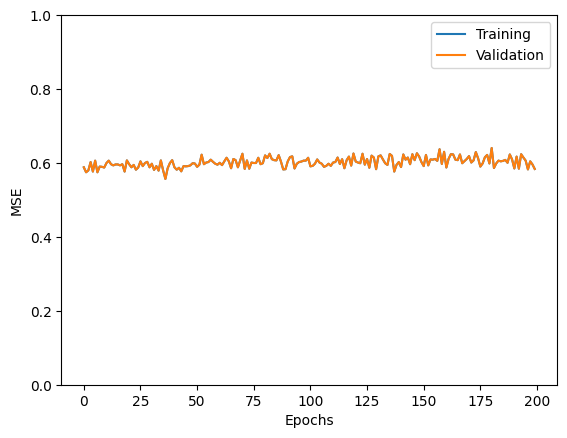

0.5567010045051575


In [ ]:
plt.plot(history.history["accuracy"],label="Training")
plt.plot(history.history["accuracy"],label="Validation")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.ylim(0,1)
plt.legend()
plt.show()
##minimum error
print(min(history.history["accuracy"]))